In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
base_cats = pd.read_csv('cat_breeds.csv', sep=";")
base_cats

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3,female,False,19,2.0,white,solid,blue,False,wet,46,16,France,43.296482,5.369780
1,Angora,0.33,4,male,False,19,2.5,white,solid,blue,False,wet,48,16,France,43.611660,3.877710
2,Angora,0.50,6,male,False,20,2.8,black,solid,green,False,wet,41,11,France,44.837789,-0.579180
3,Angora,0.50,6,female,False,21,3.0,white,solid,blue,False,wet,24,8,France,43.611660,3.877710
4,Angora,0.50,6,male,False,21,3.0,red/cream,tabby,green,False,wet,51,10,France,48.864716,2.349014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,Maine coon,0.17,2,female,False,15,1.2,white,solid,blue,False,wet,35,20,UK,51.507351,-0.127758
1067,Maine coon,0.17,2,female,False,17,1.0,black,bicolor,blue,False,wet,36,19,UK,51.507351,-0.127758
1068,Maine coon,0.17,2,male,False,14,0.7,red/cream,tabby,blue,False,wet,20,20,UK,51.507351,-0.127758
1069,Maine coon,0.17,2,male,False,16,1.1,red/cream,tabby,green,False,wet,34,19,UK,52.486244,-1.890401


In [3]:
base_cats.describe()

,Age_in_years,Age_in_months,Body_length,Weight,Owner_play_time_minutes,Sleep_time_hours,Latitude,Longitude
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,4.845462,58.145658,44.003735,5.494613,23.049486,15.889823,44.439720,-60.178554
std,2.737469,32.849889,16.310308,2.292242,10.840922,2.621443,4.965876,45.364141
min,0.080000,1.000000,10.000000,0.500000,0.000000,8.000000,37.774930,-123.116226
25%,2.670000,32.000000,35.000000,3.900000,14.000000,14.000000,40.714270,-77.036370
50%,4.920000,59.000000,41.000000,5.000000,23.000000,16.000000,42.358430,-74.005970
75%,7.040000,84.500000,51.000000,7.075000,31.000000,18.000000,48.864716,-1.890401
max,11.250000,135.000000,102.000000,12.100000,60.000000,22.000000,53.800755,13.404954


In [4]:
base_cats.isnull().sum()

Breed                      0
Age_in_years               0
Age_in_months              0
Gender                     0
Neutered_or_spayed         0
Body_length                0
Weight                     0
Fur_colour_dominant        0
Fur_pattern                0
Eye_colour                 0
Allowed_outdoor            0
Preferred_food             0
Owner_play_time_minutes    0
Sleep_time_hours           0
Country                    0
Latitude                   0
Longitude                  0
dtype: int64

In [5]:
np.unique(base_cats['Breed'], return_counts=True)

(array(['Angora', 'Maine coon', 'Ragdoll'], dtype=object),
 array([294, 342, 435], dtype=int64))

<Axes: xlabel='Breed', ylabel='count'>

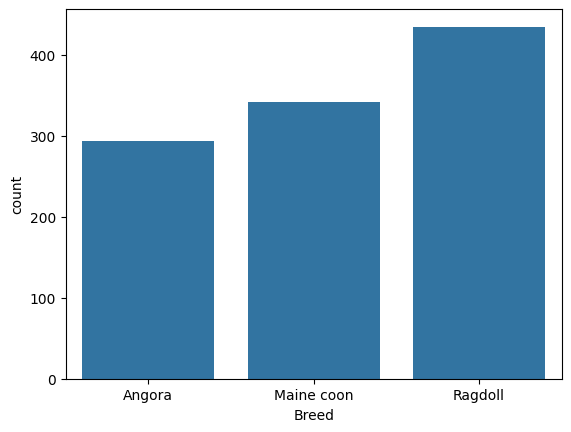

In [6]:
sns.countplot(x = base_cats['Breed'])

<Axes: xlabel='Fur_pattern', ylabel='count'>

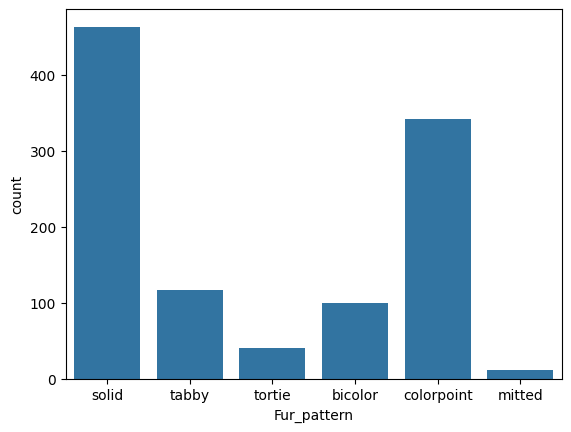

In [7]:
sns.countplot(x = base_cats['Fur_pattern'])

In [8]:
grafico = px.treemap(base_cats, path=['Breed' ,'Fur_pattern'])
grafico.show()

In [9]:
base_cats.columns

Index(['Breed', 'Age_in_years', 'Age_in_months', 'Gender',
       'Neutered_or_spayed', 'Body_length', 'Weight', 'Fur_colour_dominant',
       'Fur_pattern', 'Eye_colour', 'Allowed_outdoor', 'Preferred_food',
       'Owner_play_time_minutes', 'Sleep_time_hours', 'Country', 'Latitude',
       'Longitude'],
      dtype='object')

In [10]:
grafico = px.parallel_categories(base_cats, dimensions=['Breed', 'Country'])
grafico.show()

In [11]:
# x_cats = base_cats.iloc[:, 1:17].values
# y_cats = base_cats.iloc[:, 0].values

In [12]:
# from sklearn.preprocessing import LabelEncoder
# label_enconder_test = LabelEncoder()
# x_cats[:,1]

In [13]:
# test = label_enconder_test.fit_transform(x_cats[:,1])
# test

In [14]:
# x_cats[0]

In [15]:
features = [
    'Body_length', 'Weight', 'Fur_colour_dominant', 'Fur_pattern', 'Eye_colour', 'Country', 'Latitude', 'Longitude'
]
target = 'Breed'

clean_base = base_cats[features] # x
clean_target = base_cats[target].copy() # y

In [16]:
from sklearn.preprocessing import LabelEncoder

features_les = {}
base_encoded = clean_base.copy()
for feat in features:
    if base_encoded[feat].dtype == 'object':
        features_les[feat] = LabelEncoder()
        base_encoded[feat] = features_les[feat].fit_transform(base_encoded[feat])

target_le = LabelEncoder()
target_encoded = clean_target.copy()
if(clean_target.dtype == 'object'):
    target_encoded = target_le.fit_transform(target_encoded)
target_encoded = pd.Series(target_encoded, name=target)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
base_scaled = scaler.fit_transform(base_encoded) #x encoded

In [18]:
from sklearn.model_selection import train_test_split

x = base_scaled.copy()
y = target_encoded.copy()

x_cats_train, x_cats_test, y_cats_train, y_cats_test = train_test_split(x, y, test_size= 0.2, random_state= 11)

In [19]:
import pickle
with open('breeds.pkl', mode= 'wb') as f:
    pickle.dump([x_cats_train, y_cats_train, x_cats_test, y_cats_test], f)

#Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
import pickle
with open('breeds.pkl', 'rb') as f:
    x_cats_train, y_cats_train, x_cats_test, y_cats_test = pickle.load(f)
    
naive_cats = GaussianNB()
naive_cats.fit(x_cats_train, y_cats_train)
previsoes = naive_cats.predict(x_cats_test)
previsoes

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0,
       1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2])

In [21]:
y_cats_test

845    2
292    1
606    2
927    2
309    1
      ..
503    1
522    1
781    2
183    0
922    2
Name: Breed, Length: 215, dtype: int32

In [22]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_cats_test, previsoes)

0.9069767441860465

0.9069767441860465

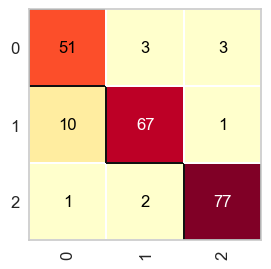

In [23]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(3,3))
cm = ConfusionMatrix(naive_cats)
cm.fit(x_cats_train, y_cats_train)
cm.score(x_cats_test, y_cats_test)

In [24]:
print(classification_report(y_cats_test, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        57
           1       0.93      0.86      0.89        78
           2       0.95      0.96      0.96        80

    accuracy                           0.91       215
   macro avg       0.90      0.91      0.90       215
weighted avg       0.91      0.91      0.91       215



#Arvore de Decisão

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
with open('breeds.pkl', 'rb') as f:
    x_cats_train, y_cats_train, x_cats_test, y_cats_test = pickle.load(f)

In [26]:
from mlxtend.plotting import plot_decision_regions

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_cats_train, y_cats_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
x_cats_train.shape, y_cats_train.shape

((856, 8), (856,))

In [28]:
x_cats_test.shape, y_cats_test.shape

((215, 8), (215,))

In [29]:
arvore_cats = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_cats.fit(x_cats_train, y_cats_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
previsoes = arvore_cats.predict(x_cats_test)
previsoes

array([2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0,
       1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2])

In [31]:
accuracy_score(y_cats_test, previsoes)

0.9209302325581395

0.9209302325581395

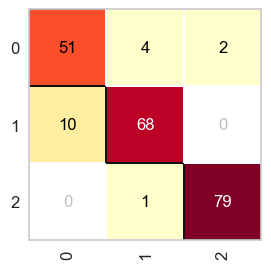

In [32]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(3,3))
cm = ConfusionMatrix(arvore_cats)
cm.fit(x_cats_train, y_cats_train)
cm.score(x_cats_test, y_cats_test)

In [33]:
print(classification_report(y_cats_test, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        57
           1       0.93      0.87      0.90        78
           2       0.98      0.99      0.98        80

    accuracy                           0.92       215
   macro avg       0.91      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



#Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
with open('breeds.pkl', 'rb') as f:
    x_cats_train, y_cats_train, x_cats_test, y_cats_test = pickle.load(f)

In [35]:
x_cats_train.shape, y_cats_train.shape

((856, 8), (856,))

In [36]:
x_cats_test.shape, y_cats_test.shape

((215, 8), (215,))

In [37]:
random_forest_cats = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_cats.fit(x_cats_train, y_cats_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [38]:
previsoes = random_forest_cats.predict(x_cats_test)
previsoes

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0,
       1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0,
       0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2])

In [39]:
y_cats_test

845    2
292    1
606    2
927    2
309    1
      ..
503    1
522    1
781    2
183    0
922    2
Name: Breed, Length: 215, dtype: int32

In [40]:
accuracy_score(y_cats_test, previsoes)

0.9627906976744186

0.9627906976744186

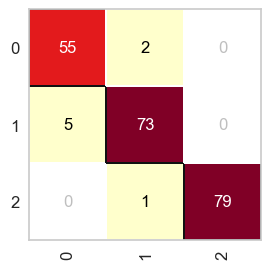

In [41]:
plt.figure(figsize=(3,3))
cm = ConfusionMatrix(random_forest_cats)
cm.fit(x_cats_train, y_cats_train)
cm.score(x_cats_test, y_cats_test)

In [42]:
print(classification_report(y_cats_test, previsoes))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.96      0.94      0.95        78
           2       1.00      0.99      0.99        80

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



#KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
with open('breeds.pkl', 'rb') as f:
    x_cats_train, y_cats_train, x_cats_test, y_cats_test = pickle.load(f)

In [44]:
x_cats_train.shape, y_cats_train.shape

((856, 8), (856,))

In [45]:
x_cats_test.shape, y_cats_test.shape

((215, 8), (215,))

In [46]:
knn_cats = KNeighborsClassifier(n_neighbors=5)
knn_cats.fit(x_cats_train, y_cats_train)

KNeighborsClassifier()

In [47]:
previsoes = knn_cats.predict(x_cats_test)
previsoes

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0,
       0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2])

In [48]:
y_cats_test

845    2
292    1
606    2
927    2
309    1
      ..
503    1
522    1
781    2
183    0
922    2
Name: Breed, Length: 215, dtype: int32

In [49]:
accuracy_score(y_cats_test, previsoes)

0.9441860465116279

0.9441860465116279

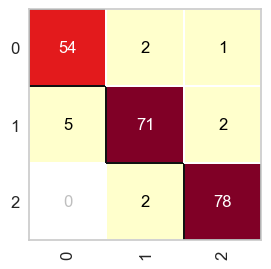

In [50]:
plt.figure(figsize=(3,3))
cm = ConfusionMatrix(knn_cats)
cm.fit(x_cats_train, y_cats_train)
cm.score(x_cats_test, y_cats_test)

In [51]:
print(classification_report(y_cats_test, previsoes))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        57
           1       0.95      0.91      0.93        78
           2       0.96      0.97      0.97        80

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



#Regressão Logística

In [52]:
from sklearn.linear_model import LogisticRegression
with open('breeds.pkl', 'rb') as f:
    x_cats_train, y_cats_train, x_cats_test, y_cats_test = pickle.load(f)

In [53]:
x_cats_train.shape, y_cats_train.shape

((856, 8), (856,))

In [54]:
x_cats_test.shape, y_cats_test.shape

((215, 8), (215,))

In [55]:
logistic_cats = LogisticRegression(random_state=1, max_iter=100)
logistic_cats.fit(x_cats_train, y_cats_train)


LogisticRegression(random_state=1)

In [56]:
previsoes = logistic_cats.predict(x_cats_test)
previsoes

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0,
       0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2])

In [57]:
y_cats_test

845    2
292    1
606    2
927    2
309    1
      ..
503    1
522    1
781    2
183    0
922    2
Name: Breed, Length: 215, dtype: int32

In [58]:
accuracy_score(y_cats_test, previsoes)

0.8418604651162791

0.8418604651162791

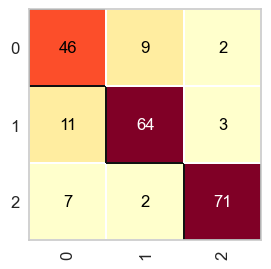

In [59]:
plt.figure(figsize=(3,3))
cm = ConfusionMatrix(logistic_cats)
cm.fit(x_cats_train, x_cats_train)
cm.score(x_cats_test, y_cats_test)